# Customer Churn Analysis

## Customer Churn Analysis

The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
Help them identify the types of customers who churn
Predict who of their current customers will churn next month

To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.

# Deliverables - What is expected
### Week 1


A presentation explaining churn for the marketing team - with links to technical aspects of your work. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.
- 1- How much is churn affecting the business? 
  How big is churn compared to the existing customer base?
- 2- Explain churn by the below categories. Are there any factors that combine to be especially impactful?
     A- Customer demographics like age and gender
     B- Services used 
     C- Billing information
- 3- what vices are typically purchased by customers who churned? Are any services especially helpful in retaining customers?
- 4- Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?

# Data Preprocessing

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [12]:
url='datase_Churn/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (1).csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1- How much is churn affecting the business? How big is churn compared to the existing customer base?

Churn
No     5174
Yes    1869
dtype: int64

Text(0.5, 1.0, 'Percent of Churn')

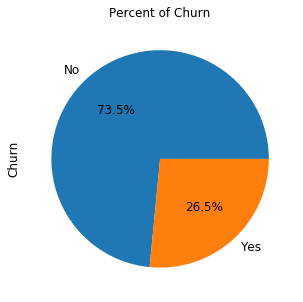

In [13]:
display(df.groupby(['Churn']).size())

ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Percent of Churn', fontsize = 12)


# How much is churn affecting the business?
Rep: The churn affects the company compared to the 1869 customers who have unsubscribed.  

## How big is churn compared to the existing customer base?
Rep: there are about 26 percent of people who have unsubscribed, so the company has lost a large portion of its customers.

### 2- Explain churn by the below categories. Are there any factors that combine to be especially impactful?
* A- Customer demographics like age and gender 
* B- Services used 
* C- Billing information

### A- Customer demographics like age and gender

In [14]:
df.groupby(['SeniorCitizen','gender','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,SeniorCitizen,gender,Churn,size
0,0,Female,No,2221
1,0,Female,Yes,699
2,0,Male,No,2287
3,0,Male,Yes,694
4,1,Female,No,328
5,1,Female,Yes,240
6,1,Male,No,338
7,1,Male,Yes,236


In [15]:
df.groupby(['gender','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,gender,Churn,size
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


## Female customers are more likely to churn vs. male customers, but the difference is minimal

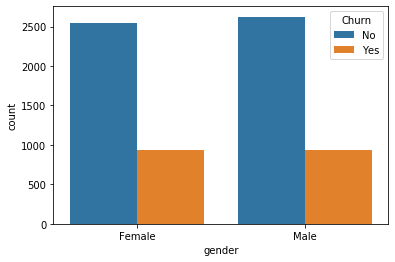

In [16]:
ax = sns.countplot(x="gender", hue="Churn", data = df)
##ax.set_title("trans")

# A- Customer demographics like age and gender
In the case of desafectation there are more women who have unsubscribed. 

In [17]:
df.groupby([ "SeniorCitizen", "Churn",]).size().to_frame().rename(columns ={0: "size"}).reset_index()

,SeniorCitizen,Churn,size
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


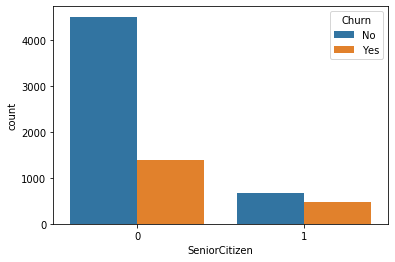

In [18]:
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data = df)
#ax.set_title("trans")

# A- Customer demographics like age and gender
Rep:

### B- Services used

In [19]:
## creation of a groupby to gather all the services to see where the number of Churn is the most affected

df.groupby(['PhoneService','MultipleLines','InternetService','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingMovies,StreamingTV,TechSupport,Churn,size
0,No,No phone service,DSL,No,No,No,No,No,77
1,No,No phone service,DSL,No,No,No,No,Yes,54
2,No,No phone service,DSL,No,No,No,Yes,No,43
3,No,No phone service,DSL,No,No,No,Yes,Yes,9
4,No,No phone service,DSL,No,No,Yes,No,No,13
...,...,...,...,...,...,...,...,...,...
159,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,41
160,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,162
161,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,23
162,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No,332


In [20]:
df.groupby[]

SyntaxError: invalid syntax (<ipython-input-20-498467bb8566>, line 1)

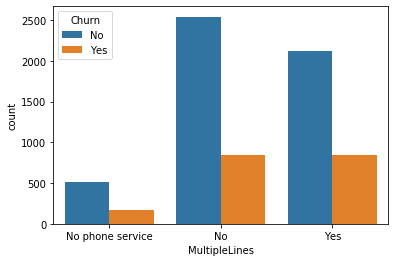

In [21]:
ax = sns.countplot(x="MultipleLines", hue="Churn", data = df)

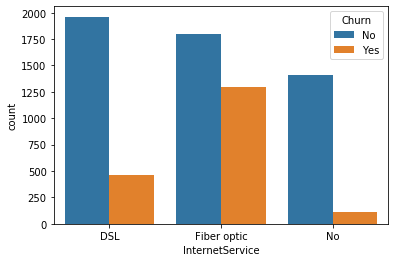

In [22]:
ax = sns.countplot(x="InternetService", hue="Churn", data = df)

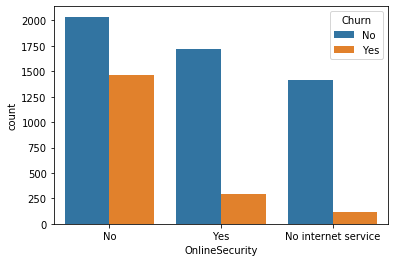

In [23]:
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data = df)

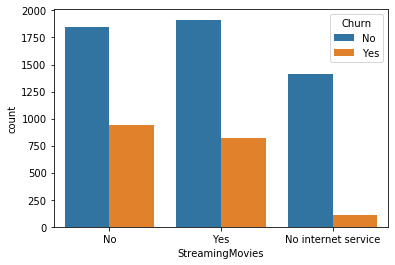

In [24]:
ax = sns.countplot(x="StreamingMovies", hue="Churn", data = df)

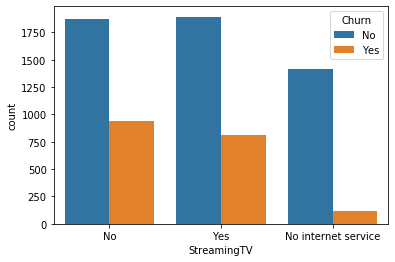

In [25]:
ax = sns.countplot(x="StreamingTV", hue="Churn", data = df)

### C-Billing information

In [26]:
df.groupby(['PaperlessBilling','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PaperlessBilling,Churn,size
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


In [27]:

df.groupby(['PaymentMethod','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PaymentMethod,Churn,size
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


In [28]:
df.groupby(['MonthlyCharges','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,MonthlyCharges,Churn,size
0,18.25,No,1
1,18.40,No,1
2,18.55,No,1
3,18.70,No,2
4,18.75,No,1
...,...,...,...
2365,118.20,No,1
2366,118.35,Yes,1
2367,118.60,No,2
2368,118.65,No,1


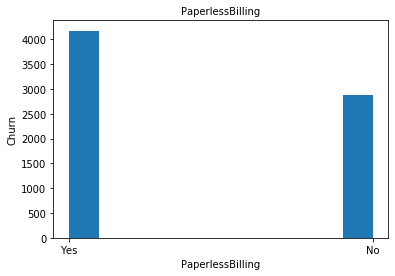

In [29]:

plt.hist(df['PaperlessBilling'])

plt.title("PaperlessBilling", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('PaperlessBilling')
plt.show()

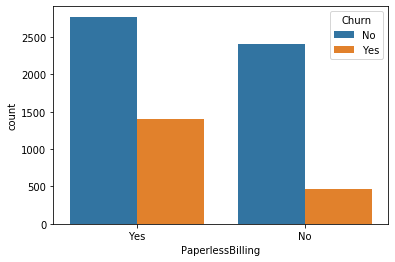

In [30]:
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data = df)

In [31]:
df['PaperlessBilling'].describe().to_frame()

,PaperlessBilling
count,7043
unique,2
top,Yes
freq,4171


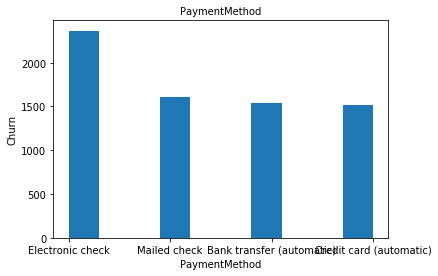

In [32]:
plt.hist(df['PaymentMethod'])

plt.title("PaymentMethod", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('PaymentMethod')
plt.show()


In [33]:
df['PaymentMethod'].describe().to_frame()

,PaymentMethod
count,7043
unique,4
top,Electronic check
freq,2365


In [34]:
df['MonthlyCharges'].describe().to_frame()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


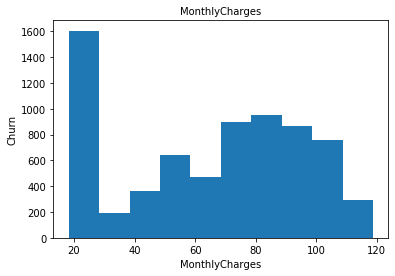

In [35]:
plt.hist(df['MonthlyCharges'])

plt.title("MonthlyCharges", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('MonthlyCharges')
plt.show()



# 3- what services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

### The services are typically purchased by customers who churned is  Phoneservices and IternetServices 


In [36]:
### affect all Churn
data_Churn = df[df.Churn== 'Yes']
data_Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


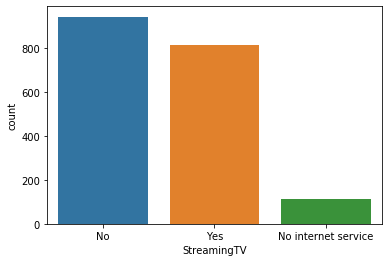

In [37]:
ax = sns.countplot(x="StreamingTV", data = data_Churn)

In [38]:
df.groupby(['StreamingTV','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,StreamingTV,Churn,size
0,No,No,1868
1,No,Yes,942
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1893
5,Yes,Yes,814


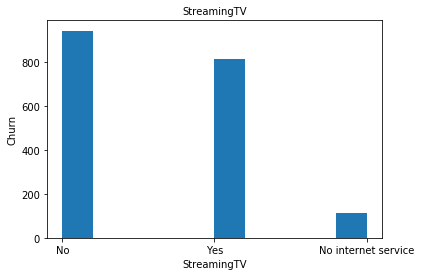

In [39]:
plt.hist(data_Churn['StreamingTV'])

plt.title("StreamingTV", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('StreamingTV')
plt.show()

### people using streamtv services are more likely to unsubscribe

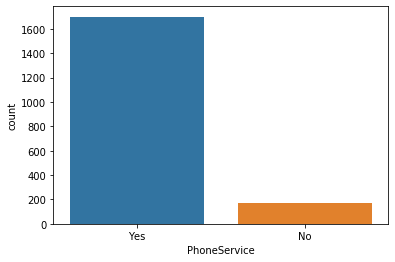

In [40]:
ax = sns.countplot(x="PhoneService", data = data_Churn)

In [41]:
df.groupby(['PhoneService','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PhoneService,Churn,size
0,No,No,512
1,No,Yes,170
2,Yes,No,4662
3,Yes,Yes,1699


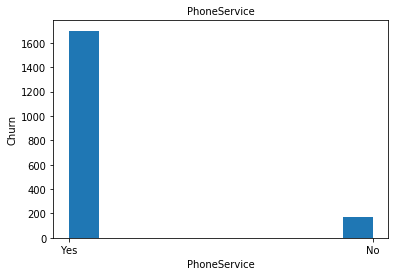

In [42]:
plt.hist(data_Churn['PhoneService'])

plt.title("PhoneService", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('PhoneService')
plt.show()

### people using streamtv services are more likely to unsubscribe

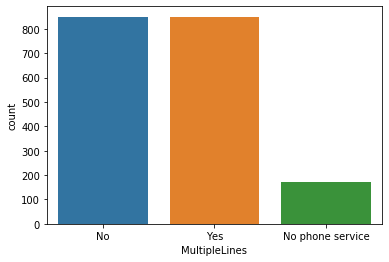

In [43]:
ax = sns.countplot(x="MultipleLines", data = data_Churn)

In [44]:
df.groupby(['MultipleLines','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,MultipleLines,Churn,size
0,No,No,2541
1,No,Yes,849
2,No phone service,No,512
3,No phone service,Yes,170
4,Yes,No,2121
5,Yes,Yes,850


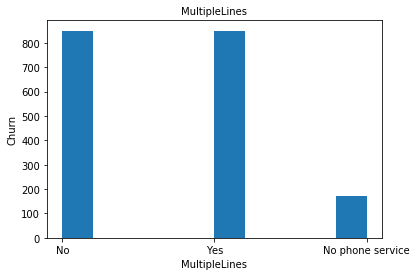

In [45]:
plt.hist(data_Churn['MultipleLines'])

plt.title("MultipleLines", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('MultipleLines')
plt.show()

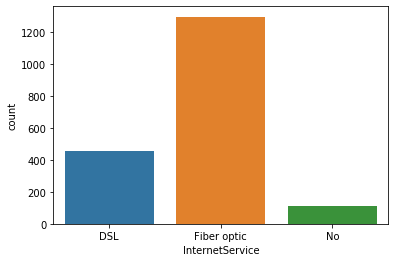

In [46]:
ax = sns.countplot(x="InternetService", data = data_Churn)

In [47]:
df.groupby(['InternetService','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,InternetService,Churn,size
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


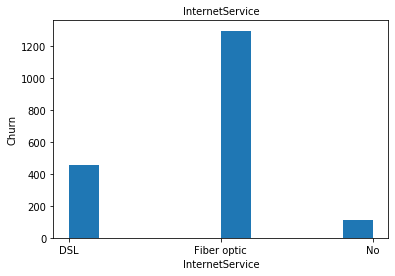

In [48]:
plt.hist(data_Churn['InternetService'])

plt.title("InternetService", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('InternetService')
plt.show()

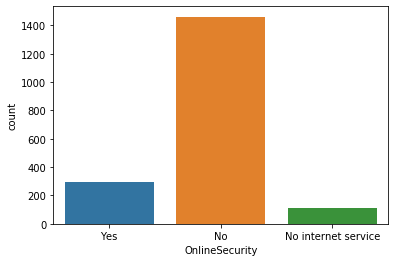

In [49]:
ax = sns.countplot(x="OnlineSecurity", data = data_Churn)

In [50]:
df.groupby(['OnlineSecurity','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,OnlineSecurity,Churn,size
0,No,No,2037
1,No,Yes,1461
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1724
5,Yes,Yes,295


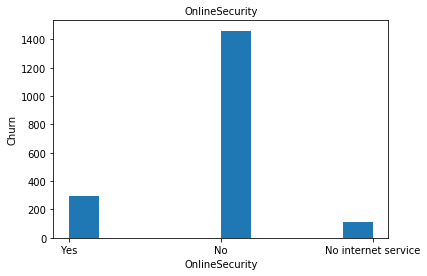

In [51]:
plt.hist(data_Churn['OnlineSecurity'])

plt.title("OnlineSecurity", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('OnlineSecurity')
plt.show()

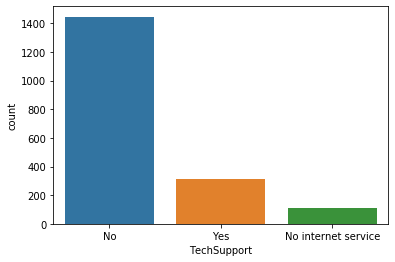

In [52]:
ax = sns.countplot(x="TechSupport", data = data_Churn)

In [53]:
df.groupby(['TechSupport','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,TechSupport,Churn,size
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


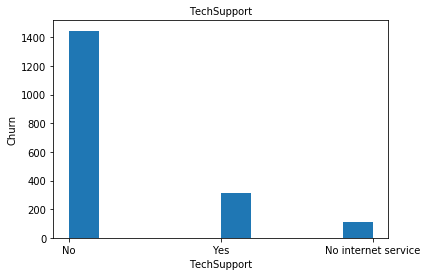

In [54]:
plt.hist(data_Churn['TechSupport'])

plt.title("TechSupport", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('TechSupport')
plt.show()

In [55]:
## affect all no Churn
data_no_Churn = df[df.Churn== 'No']
data_Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


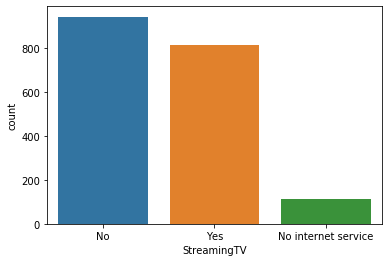

In [56]:
ax = sns.countplot(x="StreamingTV", data = data_Churn)

In [57]:
df.groupby(['StreamingTV','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,StreamingTV,Churn,size
0,No,No,1868
1,No,Yes,942
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1893
5,Yes,Yes,814


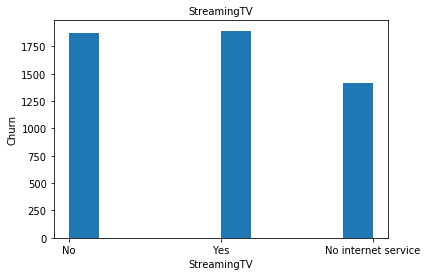

In [58]:
plt.hist(data_no_Churn['StreamingTV'])

plt.title("StreamingTV", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('StreamingTV')
plt.show()

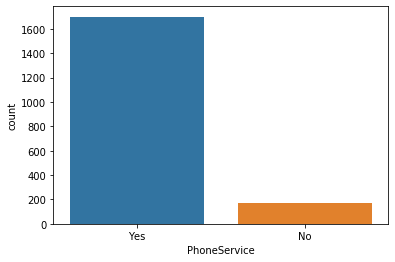

In [59]:
ax = sns.countplot(x="PhoneService", data = data_Churn)

In [60]:
df.groupby(['PhoneService','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,PhoneService,Churn,size
0,No,No,512
1,No,Yes,170
2,Yes,No,4662
3,Yes,Yes,1699


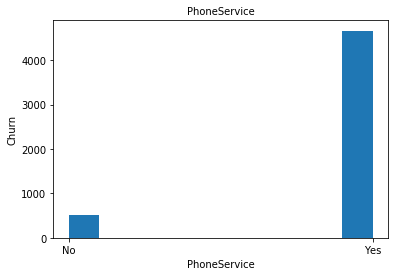

In [61]:
plt.hist(data_no_Churn['PhoneService'])

plt.title("PhoneService", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('PhoneService')
plt.show()


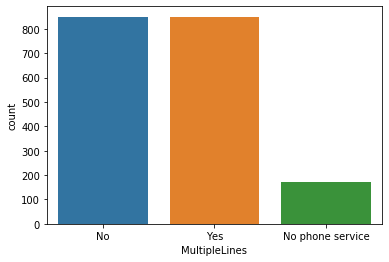

In [62]:
ax = sns.countplot(x="MultipleLines", data = data_Churn)

In [63]:
df.groupby(['MultipleLines','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,MultipleLines,Churn,size
0,No,No,2541
1,No,Yes,849
2,No phone service,No,512
3,No phone service,Yes,170
4,Yes,No,2121
5,Yes,Yes,850


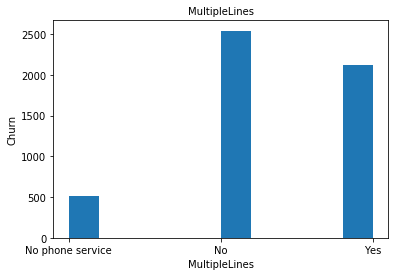

In [64]:
plt.hist(data_no_Churn['MultipleLines'])

plt.title("MultipleLines", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('MultipleLines')
plt.show()


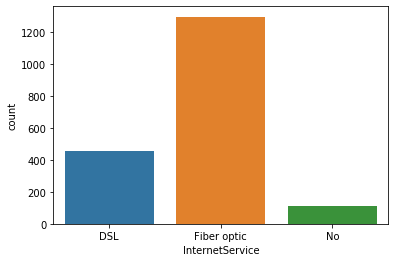

In [65]:
ax = sns.countplot(x="InternetService", data = data_Churn)

In [66]:
df.groupby(['InternetService','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,InternetService,Churn,size
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


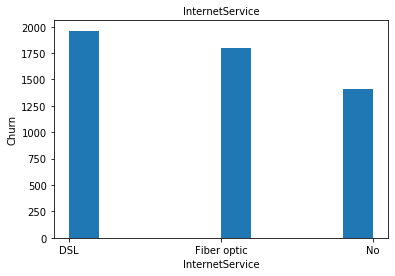

In [67]:
plt.hist(data_no_Churn['InternetService'])

plt.title("InternetService", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('InternetService')
plt.show()


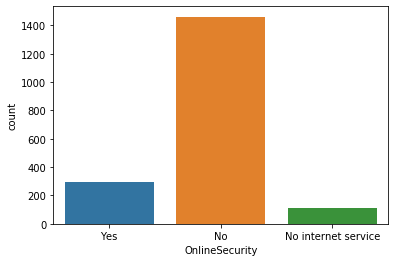

In [68]:
ax = sns.countplot(x="OnlineSecurity", data = data_Churn)

In [69]:
df.groupby(['OnlineSecurity','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,OnlineSecurity,Churn,size
0,No,No,2037
1,No,Yes,1461
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1724
5,Yes,Yes,295


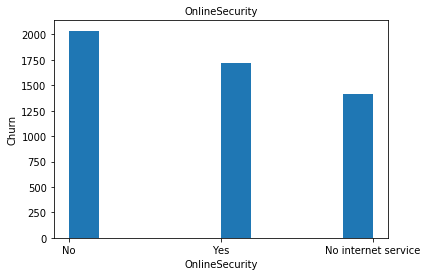

In [70]:
plt.hist(data_no_Churn['OnlineSecurity'])

plt.title("OnlineSecurity", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('OnlineSecurity')
plt.show()

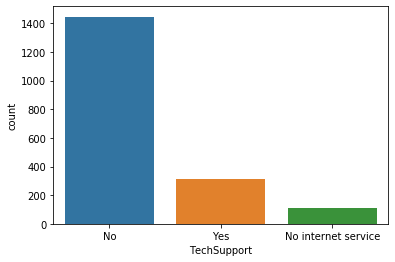

In [71]:
ax = sns.countplot(x="TechSupport", data = data_Churn)

In [72]:
df.groupby(['TechSupport','Churn']).size().to_frame().rename(columns ={0: "size"}).reset_index()

,TechSupport,Churn,size
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


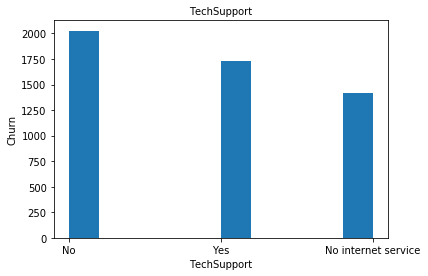

In [73]:
plt.hist(data_no_Churn['TechSupport'])

plt.title("TechSupport", fontsize=10)
plt.ylabel('Churn')
plt.xlabel('TechSupport')
plt.show()

## 4- Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?

In [74]:
quantity = 7043
Churn_rate = 0.2654
month = 0

In [75]:
while quantity >=1:
    quantity = quantity -(quantity * (Churn_rate))
    month +=1
    print(month)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [76]:
df.groupby(['gender','SeniorCitizen','Partner','Dependents']).size().to_frame()

0
gender SeniorCitizen Partner Dependents      
Female 0             No      No          1338
                             Yes          142
                     Yes     No           596
                             Yes          844
       1             No      No           317
                             Yes            3
                     Yes     No           209
                             Yes           39
Male   0             No      No          1381
                             Yes          211
                     Yes     No           567
                             Yes          822
       1             No      No           244
                             Yes            5
                     Yes     No           281
                             Yes           44

In [77]:
##gender
Qt = 3488
Churn_percent1= 0.2692
month = 0

while Qt >=1:
    Qt = Qt-(Qt*(Churn_percent1))
    month +=1
    print(month)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [78]:
##gendr
Qt_mal = 3555
Churn_percent2= 0.2641
month = 0

while Qt_mal >=1:
    Qt_mal = Qt_mal-(Qt_mal*(Churn_percent2))
    month +=1
    print(month)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [79]:
##parter
Qt_no = 3641
Churn_percent3= 0.4916
month = 0

while Qt_no >=1:
    Qt_no = Qt_no-(Qt_no*(Churn_percent3))
    month +=1
    print(month)

1
2
3
4
5
6
7
8
9
10
11
12
13


In [80]:
##parter
Qt_yes = 3402
Churn_percent4= 0.2692
month = 0

while Qt_yes >=1:
    Qt_yes = Qt_yes-(Qt_yes*(Churn_percent4))
    month +=1
    print(day1)

NameError: name 'day1' is not defined

In [81]:
##dependant
Qt_dep_yes = 2010 
Churn_percent5= 0.1744
month = 0

while Qt_dep_yes >=1:
    Qt_dep_yes = Qt_dep_yes-(Qt_dep_yes*(Churn_percent5))
    month +=1
    print(month)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [82]:
##dependant
Qt_dep_no = 4933 
Churn_percent6= 0.8256
month = 0

while Qt_dep_no >=1:
    Qt_dep_no = Qt_dep_no-(Qt_dep_no*(Churn_percent6))
    month +=1
    print(month)

1
2
3
4
5


In [83]:
##SeniorCitizen
Qt_dep_y = 5902
Churn_percent7=  0.7453
month = 0

while Qt_dep_y >=1:
    Qt_dep_y = Qt_dep_y-(Qt_dep_y*(Churn_percent7))
    month +=1
    print(month)

1
2
3
4
5
6
7


In [84]:
##SeniorCitizen
Qt_dep_majeur = 1142
Churn_percent8=  0.2547
month = 0

while Qt_dep_majeur >=1:
    Qt_dep_majeur = Qt_dep_majeur-(Qt_dep_majeur*(Churn_percent8))
    month +=1
    print(month)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


## independent people are more vulnerable to leaving because they take 5 days to leave.

In [85]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

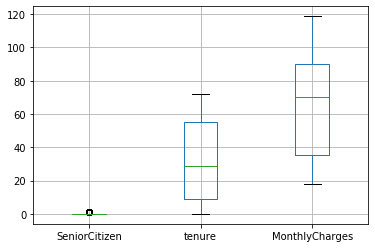

In [86]:
## graphical representation of groups of numerical data through their quarters
df.boxplot()

In [87]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### I visualize the linear correlations

In [88]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


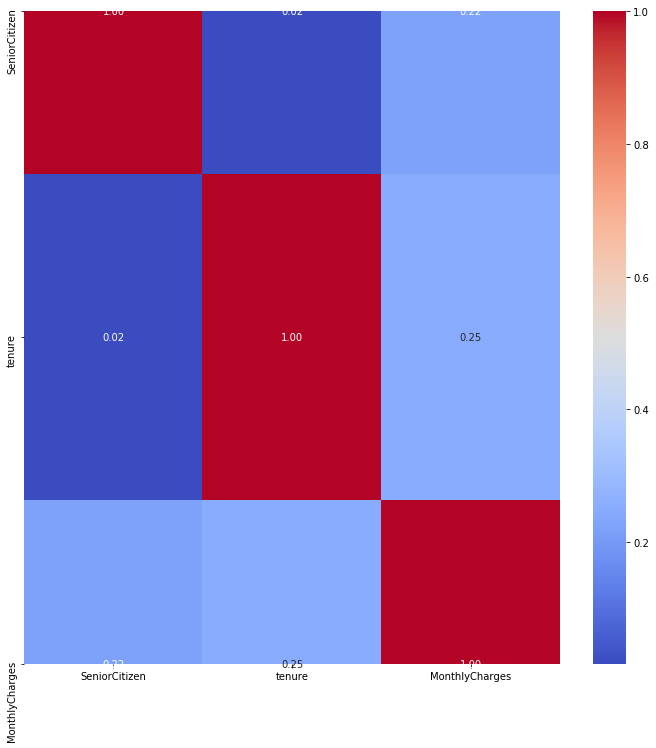

In [89]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
cm_df = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [90]:
df.shape

(7043, 21)

In [91]:
df.groupby('gender').Churn.head()


0     No
1     No
2    Yes
3     No
4    Yes
5    Yes
6     No
7     No
8    Yes
9     No
Name: Churn, dtype: object

In [92]:
##percent Churn
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [94]:
## the number of Churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Profil

In [95]:

num = data_Churn[['tenure','MonthlyCharges','TotalCharges','Churn']]
num

,tenure,MonthlyCharges,TotalCharges,Churn
2,2,53.85,108.15,Yes
4,2,70.70,151.65,Yes
5,8,99.65,820.5,Yes
8,28,104.80,3046.05,Yes
13,49,103.70,5036.3,Yes
...,...,...,...,...
7021,12,59.80,727.8,Yes
7026,9,44.20,403.35,Yes
7032,1,75.75,75.75,Yes
7034,67,102.95,6886.25,Yes


In [96]:

profile =data_Churn[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
dumm_prof = pd.get_dummies(profile[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

In [123]:

num = data_Churn[['Churn','gender']]
d_profil = pd.concat([dumm_prof,num],axis=1)

In [124]:

lste =list(d_profil.columns)

In [135]:
group_profil = d_profil.groupby(['Churn','gender']).sum()
lste =list(group_profil.columns) 
lste

['PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [152]:
val=['PhoneService_No', 'InternetService_No', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'Contract_One year', 'Contract_Month-to-month']

In [153]:
group_profil= group_profil[val]

In [154]:

from sklearn import preprocessing
values = preprocessing.normalize(group_profil )
group_profil[val] = values

In [155]:

group_profil

PhoneService_No  InternetService_No  StreamingMovies_Yes  \
Churn gender                                                             
Yes   Female         0.058938            0.041257             0.299848   
      Male           0.066249            0.041958             0.302536   

              MultipleLines_Yes  PaperlessBilling_Yes  \
Churn gender                                            
Yes   Female           0.306479              0.514972   
      Male             0.319467              0.516005   

              PaymentMethod_Bank transfer (automatic)  \
Churn gender                                            
Yes   Female                                 0.100195   
      Male                                   0.089804   

              PaymentMethod_Electronic check  Contract_One year  \
Churn gender                                                      
Yes   Female                        0.384572           0.055255   
      Male                          0.404118           0.066985   

              Contract_Month-to-month  
Churn gender                           
Yes   Female                 0.620324  
      Male                   0.598448

In [156]:
num = group_profil.reset_index()
num

,Churn,gender,PhoneService_No,InternetService_No,StreamingMovies_Yes,MultipleLines_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,Contract_One year,Contract_Month-to-month
0,Yes,Female,0.058938,0.041257,0.299848,0.306479,0.514972,0.100195,0.384572,0.055255,0.620324
1,Yes,Male,0.066249,0.041958,0.302536,0.319467,0.516005,0.089804,0.404118,0.066985,0.598448


In [157]:
theta = val
theta

['PhoneService_No',
 'InternetService_No',
 'StreamingMovies_Yes',
 'MultipleLines_Yes',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Electronic check',
 'Contract_One year',
 'Contract_Month-to-month']

In [158]:
theta= val
theta

['PhoneService_No',
 'InternetService_No',
 'StreamingMovies_Yes',
 'MultipleLines_Yes',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Electronic check',
 'Contract_One year',
 'Contract_Month-to-month']

In [159]:
r = list(num.iloc[0,2:num.shape[1]])
r

[0.05893818098491869,
 0.041256726689443086,
 0.29984799576077387,
 0.3064785411215772,
 0.514972356355727,
 0.10019490767436177,
 0.38457163092659447,
 0.05525454467336127,
 0.6203243548662692]

In [160]:
len(r)

9

In [161]:
len(theta)

9

In [162]:

import plotly.express as px
import pandas as pd

In [163]:
fig = px.line_polar (r=r, theta=theta, line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [165]:
r1 = list(num.iloc[1,2:num.shape[1]])
r1

[0.06624882648348647,
 0.041957590106208094,
 0.30253630760792155,
 0.3194665632648125,
 0.5160047484991557,
 0.0898039647887261,
 0.40411784154926744,
 0.06698492455552521,
 0.5984477325674944]

In [170]:
len(r1)

9

In [171]:
fig = px.line_polar (r=r1, theta=theta, line_close=True)
fig.update_traces(fill='toself')
fig.show()